In [35]:
import numpy as np
import scipy.interpolate as interpolate

In [12]:
env = 'duck_lift'
data = np.load(f'{env}.npz', allow_pickle=True,)
entries = data.files
print(entries)

['s_0', 'object_translation', 'object_orientation', 'length', 'SIM_SUBSTEPS', 'DATA_SUBSTEPS']


In [22]:
def data_analysis(data):
    print('range of data: ', np.min(data, axis=0), np.max(data, axis=0))
    print('start and end: ', data[0], data[-1])

In [62]:
print(entries[1], data[entries[1]].shape)
trans_data = data[entries[1]]
data_analysis(trans_data)

object_translation (38, 3)
range of data:  [-0.00808188 -0.01101126  0.03643664] [0.00642277 0.00423508 0.12783988]
start and end:  [-0.00388923  0.00383151  0.03737722] [ 0.00585419 -0.01069048  0.03661579]


In [25]:
print(entries[2], data[entries[2]].shape)
ori_data = data[entries[2]]
data_analysis(ori_data)

object_orientation (38, 4)
range of data:  [ 0.39957538 -0.01466885 -0.03785805  0.87153335] [0.49019384 0.03348235 0.0112071  0.9166966 ]
start and end:  [ 0.49019384 -0.00979013  0.00661635  0.87153335] [ 0.40458707 -0.00606367  0.00251143  0.91447593]


In [82]:
def interpolate_data(data, random_sample=5):
    points = np.random.uniform(np.min(data), np.max(data), size=random_sample)
    points=  np.concatenate([[data[0]], points])
    len_points = points.shape[0]
    f = interpolate.interp1d(np.arange(len_points), points, kind='quadratic', fill_value="extrapolate")  # ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. 

    x_new = np.arange(0, len_points, len_points/data.shape[0])
    y_new = f(x_new)
    return y_new

new_trans_data = []
for d in trans_data.T:
    new_trans_data.append(interpolate_data(d))
new_trans_data = np.array(new_trans_data).T
print(new_trans_data.shape)

(38, 3)


(80,)


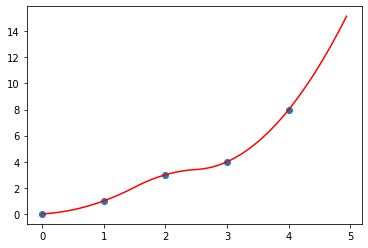

In [80]:
# example of interpolation
new_points = [0,1,3, 4, 8]
len_data = 80
f = interpolate.interp1d(np.arange(len(new_points)), new_points, kind='quadratic', fill_value="extrapolate")  # ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. 
x_new = np.arange(0, len(new_points), len(new_points)/len_data)
y_new = f(x_new)
print(y_new.shape)

import matplotlib.pyplot as plt
plt.scatter(np.arange(len(new_points)), new_points)
plt.plot(x_new,y_new,'r', label='interp/extrap')
plt.show()